In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv


In [3]:
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv')

In [4]:
df.describe()

,Domain,Job Title,Projected Growth by 2030
count,13606025,13606025,13606025
unique,13,6,72
top,Artificial Intelligence,Architect,77%
freq,1047730,2269578,543372


In [5]:
df.head(10)

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%
5,Data Analytics,Manager,110%
6,Virtual Reality (VR),Analyst,53%
7,Cloud Computing,Architect,110%
8,Data Analytics,Manager,64%
9,Cloud Computing,Consultant,64%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606025 entries, 0 to 13606024
Data columns (total 3 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Domain                    object
 1   Job Title                 object
 2   Projected Growth by 2030  object
dtypes: object(3)
memory usage: 311.4+ MB


In [9]:
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606025 entries, 0 to 13606024
Data columns (total 3 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Domain                    object
 1   Job Title                 object
 2   Projected Growth by 2030  int64 
dtypes: int64(1), object(2)
memory usage: 311.4+ MB


In [13]:
df.head(10)

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77
1,5G Networks,Developer,70
2,Cybersecurity,Engineer,36
3,Internet of Things (IoT),Consultant,138
4,Cybersecurity,Analyst,86
5,Data Analytics,Manager,110
6,Virtual Reality (VR),Analyst,53
7,Cloud Computing,Architect,110
8,Data Analytics,Manager,64
9,Cloud Computing,Consultant,64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv')

In [21]:
# Which Domain the most on It Job Prediction using EDA

df.Domain.value_counts()

Domain
Artificial Intelligence     1047730
Quantum Computing           1047452
5G Networks                 1047402
Blockchain                  1047138
Augmented Reality (AR)      1046899
Data Analytics              1046803
Edge Computing              1046741
Virtual Reality (VR)        1046363
Cybersecurity               1046237
Cloud Computing             1046187
DevOps                      1046017
Robotics                    1046001
Internet of Things (IoT)    1045055
Name: count, dtype: int64

In [49]:
df.columns = df.columns.str.replace(' ', '_')

# Which Job Title the most on It Job Prediction using EDA? In order to do this, I first edited the column name.

df.Job_Title.value_counts()

Job_Title
Architect     2269578
Manager       2268512
Consultant    2267291
Developer     2267069
Engineer      2266984
Analyst       2266591
Name: count, dtype: int64

<Axes: title={'center': 'Projected Growth by 2030 Distribution Plot'}, xlabel='Projected Growth by 2030', ylabel='Density'>

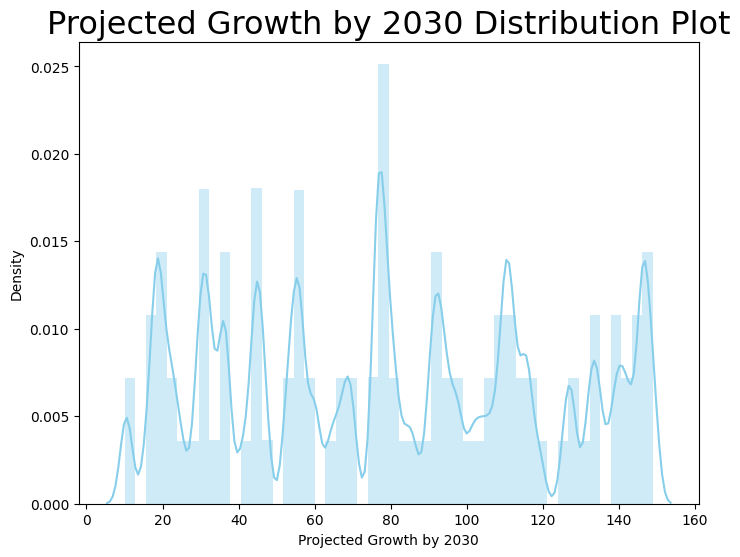

In [103]:
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')

f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Projected Growth by 2030 Distribution Plot',fontsize=23)
sns.distplot(df['Projected Growth by 2030'], color='skyblue')

Numerical values in the table: We saw that the Projected Growth by 2030 feature has a value of 80. To represent this visually, we can make such a visualization with the seaborn library.

In [104]:
df.head(10)

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77
1,5G Networks,Developer,70
2,Cybersecurity,Engineer,36
3,Internet of Things (IoT),Consultant,138
4,Cybersecurity,Analyst,86
5,Data Analytics,Manager,110
6,Virtual Reality (VR),Analyst,53
7,Cloud Computing,Architect,110
8,Data Analytics,Manager,64
9,Cloud Computing,Consultant,64


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


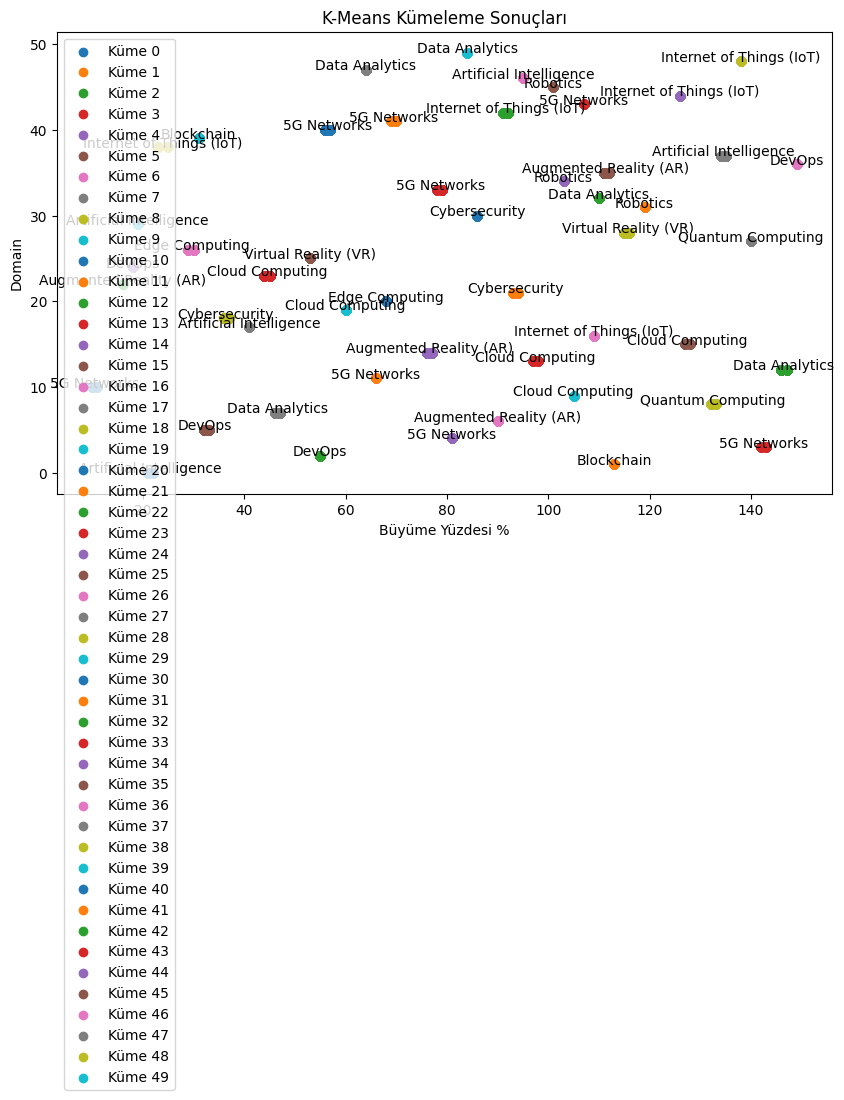

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# CSV dosyasını yükleme
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv', nrows= 10000)
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')
# Özellikleri ayırma
X_text = df[['Domain']].values  # Metin verileri
Y = df['Projected Growth by 2030'].values    # Sayısal veriler

# One-Hot Encoding uygulama
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_text)

# Sayısal verilerle birleştirme
X_combined = np.hstack((X_encoded, Y.reshape(-1, 1)))

# K-Means modelini oluşturma
kmeans = KMeans(n_clusters=50, random_state=42)  # Küme sayısını 50 olarak belirliyoruz

# Modeli eğitme
kmeans.fit(X_combined)

# Küme etiketlerini alma
labels = kmeans.labels_

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Her bir küme için farklı renkler kullanma
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    plt.scatter(Y[cluster_indices], [label] * len(cluster_indices), label=f'Küme {label}')

# Meslek isimlerini yazdırma
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    if len(cluster_indices) > 0:
        first_meslek = df['Domain'].values[cluster_indices[0]]  # İlk meslek
        plt.text(Y[cluster_indices].mean(), label, first_meslek, fontsize=10, ha='center')

plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Büyüme Yüzdesi %')
plt.ylabel('Domain')
plt.legend()
plt.show()




/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


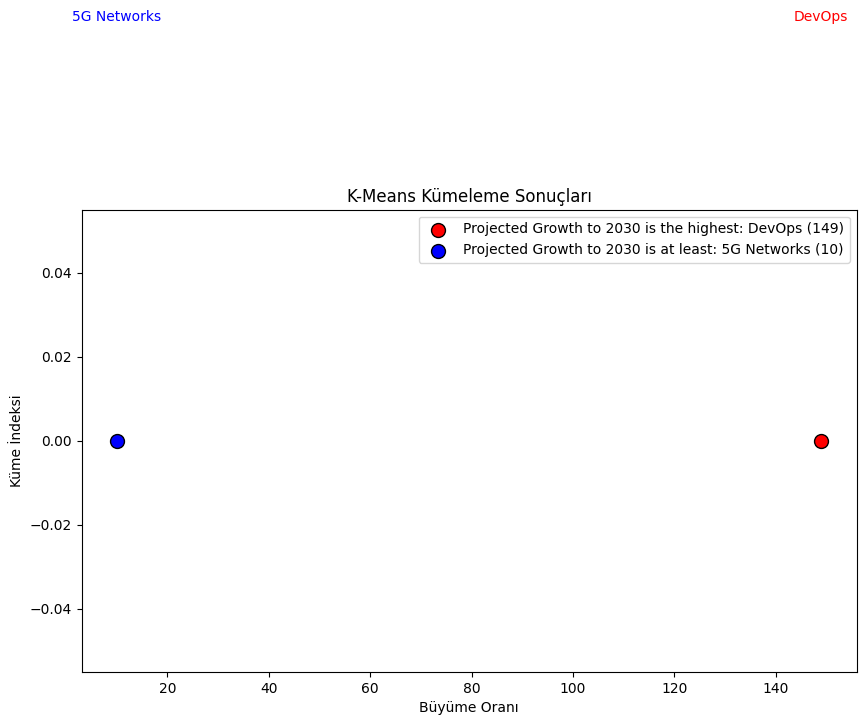

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# CSV dosyasını yükleme
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv', nrows= 10000)
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')
# Özellikleri ayırma
X_text = df[['Domain']].values  # Metin verileri
Y = df['Projected Growth by 2030'].values    # Sayısal veriler

# One-Hot Encoding uygulama
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_text)

# Sayısal verilerle birleştirme
X_combined = np.hstack((X_encoded, Y.reshape(-1, 1)))

# K-Means modelini oluşturma
kmeans = KMeans(n_clusters=30, random_state=42)  # Küme sayısını 3 olarak belirliyoruz

# Modeli eğitme
kmeans.fit(X_combined)

# Küme etiketlerini alma
labels = kmeans.labels_

# En yüksek ve en düşük büyüme bulma
max_salary = df['Projected Growth by 2030'].max()
min_salary = df['Projected Growth by 2030'].min()

max_salary_job = df.loc[df['Projected Growth by 2030'] == max_salary, 'Domain'].values[0]
min_salary_job = df.loc[df['Projected Growth by 2030'] == min_salary, 'Domain'].values[0]

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Her bir küme için farklı renkler kullanma
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    #plt.scatter(Y[cluster_indices], [label] * len(cluster_indices), label=f'Küme {label}')

# En yüksek ve en düşük büyüme işaretleme
plt.scatter(max_salary, 0, color='red', s=100, label=f'Projected Growth to 2030 is the highest: {max_salary_job} ({max_salary})', edgecolor='black')
plt.scatter(min_salary, 0, color='blue', s=100, label=f'Projected Growth to 2030 is at least: {min_salary_job} ({min_salary})', edgecolor='black')

# Meslek isimlerini yazdırma
plt.text(max_salary, 0.1, max_salary_job, fontsize=10, ha='center', color='red')
plt.text(min_salary, 0.1, min_salary_job, fontsize=10, ha='center', color='blue')

plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Büyüme Oranı')
plt.ylabel('Küme İndeksi')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


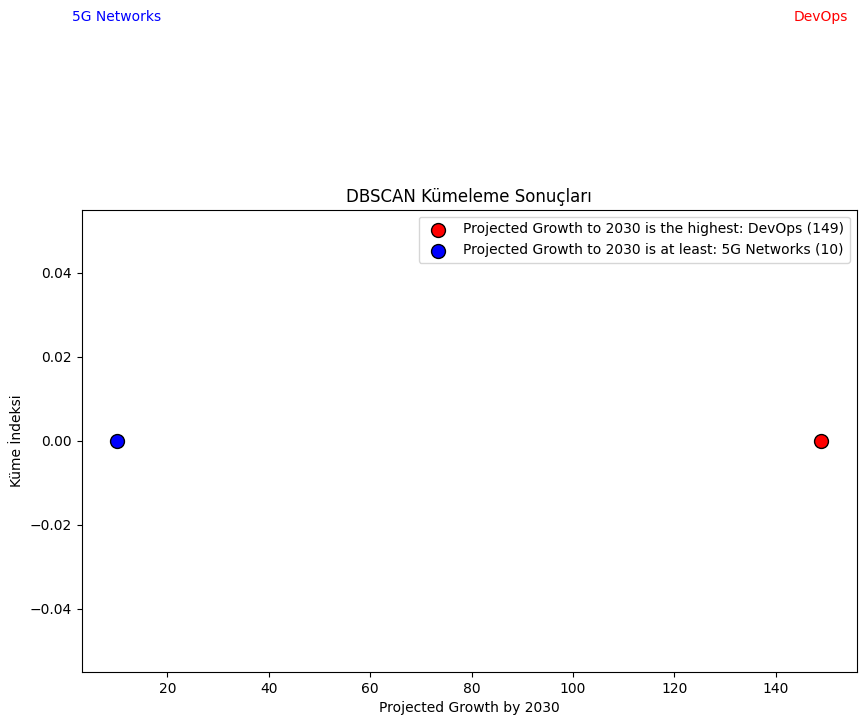

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder

# CSV dosyasını yükleme
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv', nrows= 10000)
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')
# Özellikleri ayırma
X_text = df[['Domain']].values  # Metin verileri
Y = df['Projected Growth by 2030'].values    # Sayısal veriler

# One-Hot Encoding uygulama
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_text)

# Sayısal verilerle birleştirme
X_combined = np.hstack((X_encoded, Y.reshape(-1, 1)))

# DBSCAN modelini oluşturma
dbscan = DBSCAN(eps=0.5, min_samples=2)

# Modeli eğitme
labels = dbscan.fit_predict(X_combined)

# En yüksek ve en düşük büyüme bulma
max_salary = df['Projected Growth by 2030'].max()
min_salary = df['Projected Growth by 2030'].min()

max_salary_job = df.loc[df['Projected Growth by 2030'] == max_salary, 'Domain'].values[0]
min_salary_job = df.loc[df['Projected Growth by 2030'] == min_salary, 'Domain'].values[0]

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Her bir küme için farklı renkler kullanma
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    #plt.scatter(Y[cluster_indices], [label] * len(cluster_indices), label=f'Küme {label}')

# En yüksek ve en düşük büyüme işaretleme
plt.scatter(max_salary, 0, color='red', s=100, label=f'Projected Growth to 2030 is the highest: {max_salary_job} ({max_salary})', edgecolor='black')
plt.scatter(min_salary, 0, color='blue', s=100, label=f'Projected Growth to 2030 is at least: {min_salary_job} ({min_salary})', edgecolor='black')

# Meslek isimlerini yazdırma
plt.text(max_salary, 0.1, max_salary_job, fontsize=10, ha='center', color='red')
plt.text(min_salary, 0.1, min_salary_job, fontsize=10, ha='center', color='blue')

plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel('Projected Growth by 2030')
plt.ylabel('Küme İndeksi')
plt.legend()
plt.show()


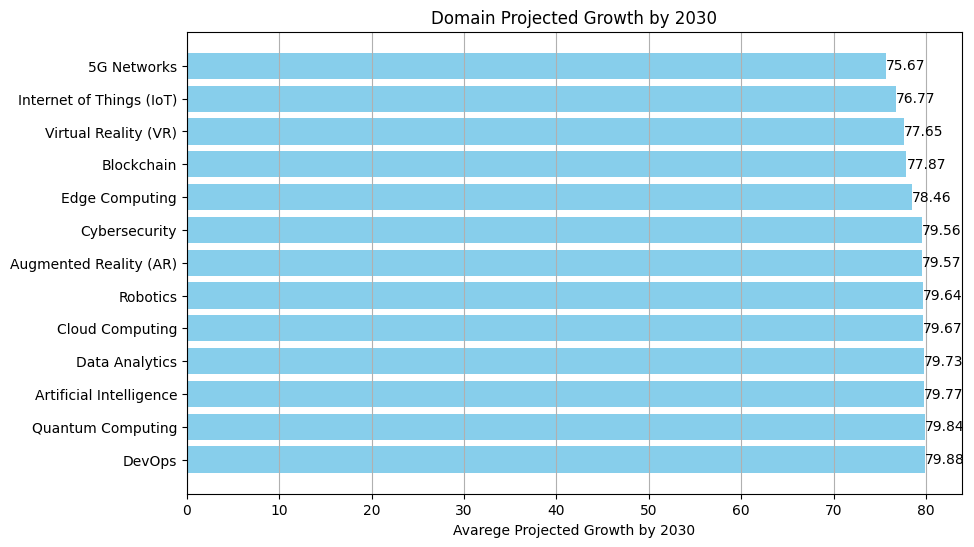

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını yükleme
df = pd.read_csv('/kaggle/input/it-jobs-demand-by-2030/it_jobs_2030.csv', nrows= 10000)
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '')
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].astype('int64')

# Meslekler için ortalama büyüme hesaplama
average_salary = df.groupby('Domain')['Projected Growth by 2030'].mean().reset_index()

# Ortalama büyüme sıralama
average_salary = average_salary.sort_values(by='Projected Growth by 2030', ascending=False)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.barh(average_salary['Domain'], average_salary['Projected Growth by 2030'], color='skyblue')
plt.xlabel('Avarege Projected Growth by 2030')
plt.title('Domain Projected Growth by 2030')
plt.grid(axis='x')

# Grafik üzerine değerleri yazdırma
for index, value in enumerate(average_salary['Projected Growth by 2030']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()
